<center> <h1>COMPANY BANKRUPTCY PREDICTION </h1>
<h3>Bankruptcy data from Taiwan Economic Journal for the years 1999-2009</h3>

### Context
The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company Bankruptcy was defined on the basis of the business regulations of Taiwan Stock Exchange.

### Goal
To predict if a company will go bankrupt or not. (Supervised ML problem)

### Tasks:
1. Domain research
2. Descriptive Statistics
3. Data Cleaning / Preprocessing (hint: drop null values)
4. Exploratory Data Analysis, Visualization
5. Noting down Insights
6. Preparing features and targets for prediction
7. Splitting train / test data
8. Initilizing prediction algorithm (hint:  Logistic Regression)
9. Training the data, and getting test predictions
10. Evaluation of metrics (confusion matrix, classification report)

### 1. Domain Research
* Useful keywords for prediction
    - ROA(A)
    - ROA(C)
    - LIABILITY
    - EQUITY
    - PROFIT RATES
    - INTEREST RATES
    - BANKRUPTCY

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#dataset
data = pd.read_csv("company_bankruptcy.csv")


### 2. Descriptive Statistics

In [3]:
data.shape

(6819, 96)

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Bankrupt?,6819.0,0.032263,0.176710,0.0,0.000000,0.000000,0.000000,1.0
ROA(C) before interest and depreciation before interest,6819.0,0.505180,0.060686,0.0,0.476527,0.502706,0.535563,1.0
ROA(A) before interest and % after tax,6819.0,0.558625,0.065620,0.0,0.535543,0.559802,0.589157,1.0
ROA(B) before interest and depreciation after tax,6819.0,0.553589,0.061595,0.0,0.527277,0.552278,0.584105,1.0
Operating Gross Margin,6819.0,0.607948,0.016934,0.0,0.600445,0.605997,0.613914,1.0
...,...,...,...,...,...,...,...,...
Liability to Equity,6819.0,0.280365,0.014463,0.0,0.276944,0.278778,0.281449,1.0
Degree of Financial Leverage (DFL),6819.0,0.027541,0.015668,0.0,0.026791,0.026808,0.026913,1.0
Interest Coverage Ratio (Interest expense to EBIT),6819.0,0.565358,0.013214,0.0,0.565158,0.565252,0.565725,1.0
Net Income Flag,6819.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.0


In [7]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

### 3. Data Cleaning/Data Preprocessing

- As there are no null value, no data cleaning required

In [8]:
data["Bankrupt?"].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

### 4. Exploratory Data Analysis and Visualization

<AxesSubplot:>

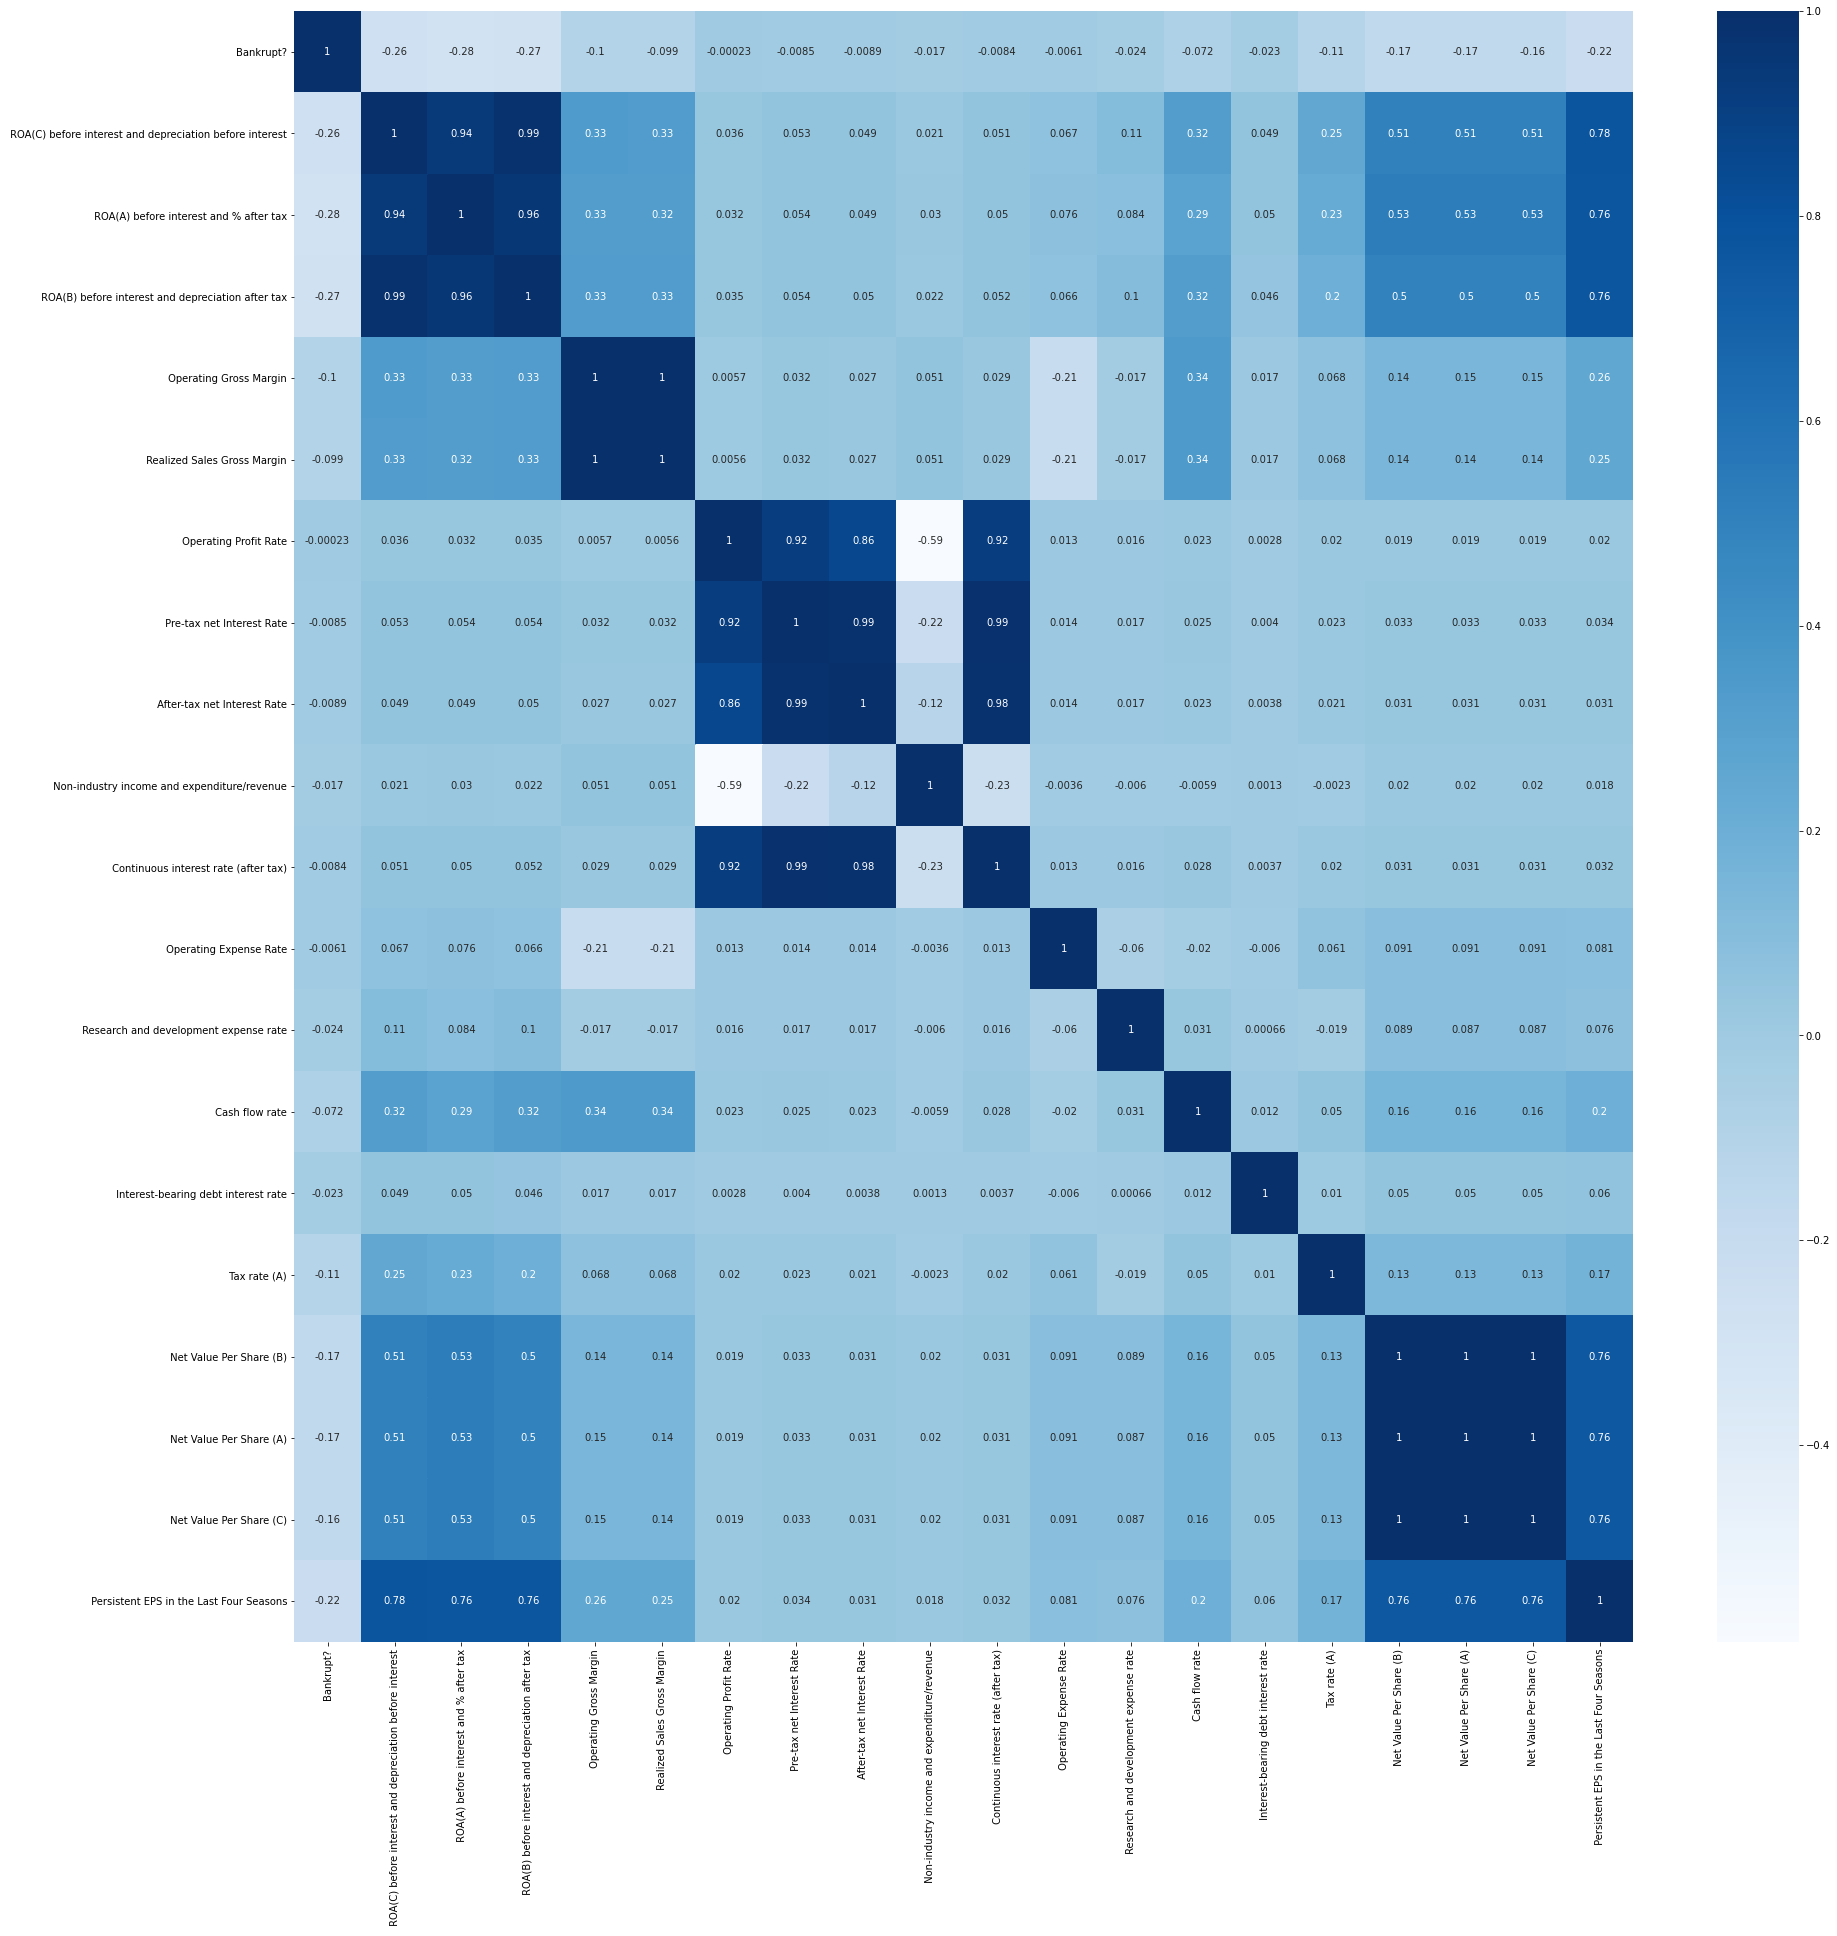

In [9]:
datacorr = data.corr()
plt.figure(figsize = (30,30))
sb.heatmap(datacorr.iloc[:20,:20], annot = True, cmap = "Blues")

Insight :
- The dark coloured areas has some relation in between

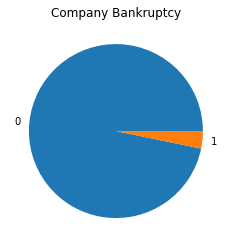

In [10]:
bank = data["Bankrupt?"].value_counts()
plt.pie(bank, labels = bank.index)
plt.title("Company Bankruptcy")
plt.show()

Insight :
- Almost 95% companies are not bankrupt and rest companies are bankrupt.

In [11]:
data = data.iloc[1:]
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534


In [12]:
col_names = ["label", "ROA(C)","ROA(A)","ROA(B)","OGM","RSGM","OPR","PNIR","ANIR","NIE","CIR","OER",
             "RDER","CFR","IDIR","TR(A)","NVPS(B)","NVPS(A)","NVPS(C)","PEPS(LFS)","CFPS","RPS",
            "OPPS","PSNP(BT)","RSGPGR","OPGR","ANPGR","RNPGR","CNPGR","TAGR","NVGR","TARGRR",
            "CRI","CR","QR","IER","TNW","DR","NW","LFSR(A)","BD","CNW","OPC","NPBTC","IANV","TAT",
             "ART","ACD","ITR(T)","FATF","NWTR(T)","RP","OPP","ARP","WCTA","QA","CUA","CAA","QACUL",
             "CCUL","CLA","OFL","IWC","ICUL","CUL","WCE","CULE","LLCA","RETA","TITE","TEA","CUATR",
             "QATR","WCTR","CTR","CFS","FAA","CLL","CLE","ELTL","CFTA","CFL","CFOA","CFE","CLCA",
             "LAF","NITA","TAGP","NCI","GPS","NISE","LTE","DFL","ICR","NIF","ETL"]

data = pd.read_csv("company_bankruptcy.csv", header = None, names = col_names)

In [13]:
data = data.iloc[1:]
data

,label,ROA(C),ROA(A),ROA(B),OGM,RSGM,OPR,PNIR,ANIR,NIE,...,NITA,TAGP,NCI,GPS,NISE,LTE,DFL,ICR,NIF,ETL
1,1,0.370594257300249,0.424389446140427,0.40574977247176,0.601457213277793,0.601457213277793,0.998969203197885,0.796887145860514,0.808809360876843,0.302646433889668,...,0.716845343217827,0.00921944002110296,0.622878959445127,0.601453290101533,0.82789021403512,0.29020189277926,0.0266006307607414,0.564050112276341,1,0.0164687409123162
2,1,0.464290937454297,0.53821412996075,0.516730017666899,0.610235085544617,0.610235085544617,0.998945978205482,0.797380191277827,0.809300725667939,0.303556430290771,...,0.795297136043035,0.00832330179481035,0.623651741728055,0.610236525929872,0.839969268005573,0.283845979801729,0.264576819837375,0.570174946412453,1,0.020794306334635
3,1,0.426071271876371,0.499018752725687,0.472295090743616,0.601450006486113,0.601363524985947,0.998857353483229,0.796403369254357,0.808387521469543,0.302035177342951,...,0.774669696989803,0.0400028528527523,0.623841037589316,0.601449340486212,0.836774308550174,0.290188532942043,0.0265547199199004,0.563706076496047,1,0.0164741143272785
4,1,0.399844001364988,0.451264718709115,0.457733283366347,0.583541129160121,0.583541129160121,0.998699747067122,0.796966968308828,0.808965597694361,0.303349536022685,...,0.739554525158061,0.00325247529112739,0.622928709143491,0.583537612244893,0.834697106753341,0.281721192981814,0.0266966344214761,0.564663420271241,1,0.0239823322073886
5,1,0.465022181055916,0.538432184910597,0.522297767546443,0.598783493564335,0.598783493564335,0.998973131803565,0.797366080550396,0.809303720206941,0.303474977757658,...,0.79501587263578,0.00387756309380024,0.623520697668313,0.598781509888099,0.839972745788203,0.278513789880418,0.0247518480523254,0.575616645216918,1,0.0354902008836198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6815,0,0.49368693023936,0.539467945922372,0.543230365651266,0.604455238616873,0.604462445408553,0.99899208154861,0.79740896609455,0.809331061650007,0.30351026579871,...,0.799927035325776,0.000465510522693195,0.62361951059448,0.604454564184059,0.840358959633455,0.27960554493047,0.0270642688796926,0.566193211069536,1,0.0298901443681636
6816,0,0.475162092331692,0.538268643698212,0.524171529525135,0.598307845313423,0.598307845313423,0.998992197095836,0.797414361372686,0.809327285926917,0.303519692056251,...,0.799748436729834,0.00195923746097177,0.623930754506575,0.598306063881437,0.840305739487351,0.278132139175,0.027008576481165,0.566018200931818,1,0.0382836926696726
6817,0,0.47272461365963,0.533744003488879,0.520638149793886,0.610444082503351,0.610213465169576,0.998984455431702,0.79740094234758,0.809316870139082,0.30351219939,...,0.797778066874433,0.00283988481693132,0.624156081624564,0.610440585352296,0.840138262899323,0.275788656341436,0.0267911566924924,0.565158395757604,1,0.0976487374520162
6818,0,0.506264320187198,0.559910597470563,0.554044649071149,0.607849637498379,0.607849637498379,0.99907377343731,0.797499855780065,0.809399415257671,0.303498180853144,...,0.81180790121152,0.00283719577868448,0.623957493568583,0.607845915893622,0.841083611494015,0.277547175933739,0.0268220476697979,0.565301507053585,1,0.0440094471642285


### 6. Preparing Features/targets for prediction


In [14]:
feature_cols = ["ROA(C)","ROA(A)","LTE","ETL","OPR","NIF"]
X = data[feature_cols]
y = data.label

### 7. Splitting data into Train/Test sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 101)

### 8. Initializing Prediction Algorithm (Logistic Regression)

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

### 9. Training the Data and getting test predictions

In [17]:
y_pred = logreg.predict(X_test)

In [18]:
y_pred.shape

(1705,)

### 10. Evaluation of metrics (confusion matrix, classification report)

In [19]:
#Confusion matrix
cnf_mat = metrics.confusion_matrix(y_test, y_pred)
cnf_mat

array([[1646,    0],
       [  56,    3]], dtype=int64)

- No. of wrong predictions : 0 + 56 = 56
- No. of Right Predictions : 1646 + 3 = 1649

In [20]:
#Accuracy of model
print("Accuracy of Logistic Regression model on test set is : ", logreg.score(X_test, y_test)*100,"%")

Accuracy of Logistic Regression model on test set is :  96.71554252199414 %


In [21]:
#Classification report
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1646
           1       1.00      0.05      0.10        59

    accuracy                           0.97      1705
   macro avg       0.98      0.53      0.54      1705
weighted avg       0.97      0.97      0.95      1705



### The End